In [2]:
# Import libraries
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv("bank-marketing.csv")

In [4]:
df.head()

,age,age group,eligible,job,salary,marital,education,marital-education,targeted,default,...,contact,day,month,duration,campaign,pdays,previous,poutcome,y,response
0,58,5,Y,management,100000,married,tertiary,married-tertiary,yes,no,...,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,4,Y,technician,60000,single,secondary,single-secondary,yes,no,...,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,3,Y,entrepreneur,120000,married,secondary,married-secondary,yes,no,...,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,4,Y,blue-collar,20000,married,unknown,married-unknown,no,no,...,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,3,Y,unknown,0,single,unknown,single-unknown,no,no,...,unknown,5,may,198,1,-1,0,unknown,no,0


In [5]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   age group          45211 non-null  int64 
 2   eligible           45211 non-null  object
 3   job                45211 non-null  object
 4   salary             45211 non-null  int64 
 5   marital            45211 non-null  object
 6   education          45211 non-null  object
 7   marital-education  45211 non-null  object
 8   targeted           45211 non-null  object
 9   default            45211 non-null  object
 10  balance            45211 non-null  int64 
 11  housing            45211 non-null  object
 12  loan               45211 non-null  object
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

In [6]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [7]:
# Handle missing values
df.fillna(method='ffill', inplace=True)

In [8]:
# Clean data (optional: handle 'salary', 'education' formatting, etc.)
df.columns = df.columns.str.strip().str.lower().str.replace('-', '_')  # Standardize column names

EDA

In [9]:
# Descriptive Statistics
print("Mean:\n", df.mean(numeric_only=True))
print("Median:\n", df.median(numeric_only=True))
print("Mode:\n", df.mode(numeric_only=True).iloc[0])
print("Variance:\n", df.var(numeric_only=True))
print("Standard Deviation:\n", df.std(numeric_only=True))

Mean:
 age             40.936210
age group        3.645861
salary       57006.171065
balance       1362.272058
day             15.806419
duration       258.163080
campaign         2.763841
pdays           40.197828
previous         0.580323
response         0.116985
dtype: float64
Median:
 age             39.0
age group        3.0
salary       60000.0
balance        448.0
day             16.0
duration       180.0
campaign         2.0
pdays           -1.0
previous         0.0
response         0.0
dtype: float64
Mode:
 age             32
age group        3
salary       20000
balance          0
day             20
duration       124
campaign         1
pdays           -1
previous         0
response         0
Name: 0, dtype: int64
Variance:
 age          1.127581e+02
age group    1.173477e+00
salary       1.029493e+09
balance      9.270599e+06
day          6.926361e+01
duration     6.632057e+04
campaign     9.597733e+00
pdays        1.002577e+04
previous     5.305841e+00
response     1.03301

C:\Users\joshm\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


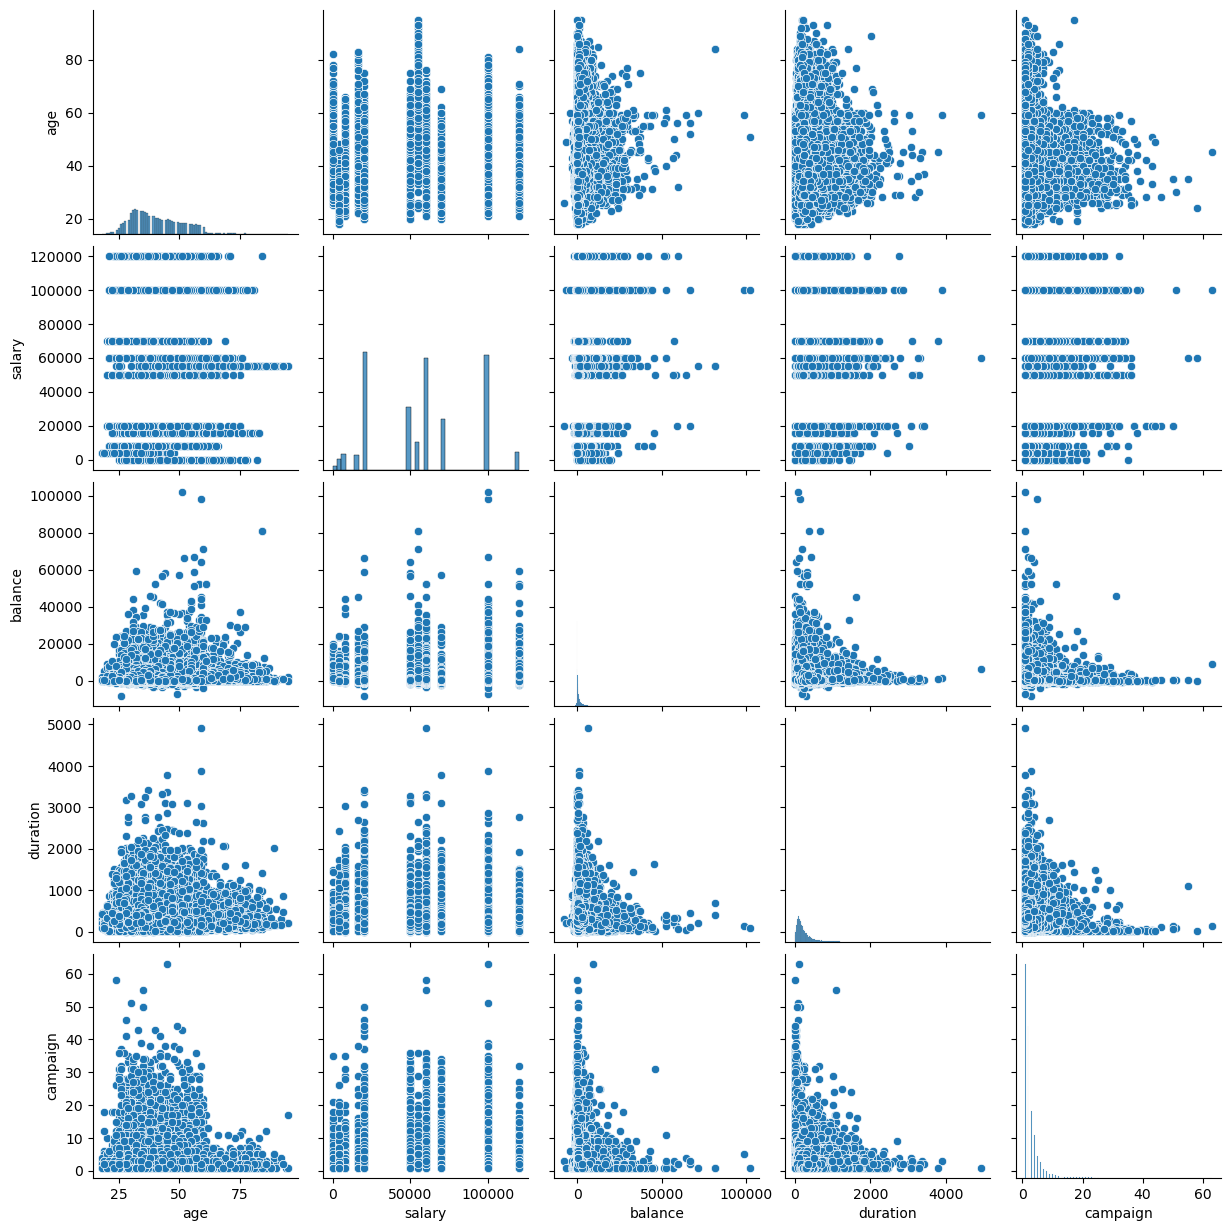

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot (you can limit columns if many)
sns.pairplot(df[['age', 'salary', 'balance', 'duration', 'campaign']])
plt.show()

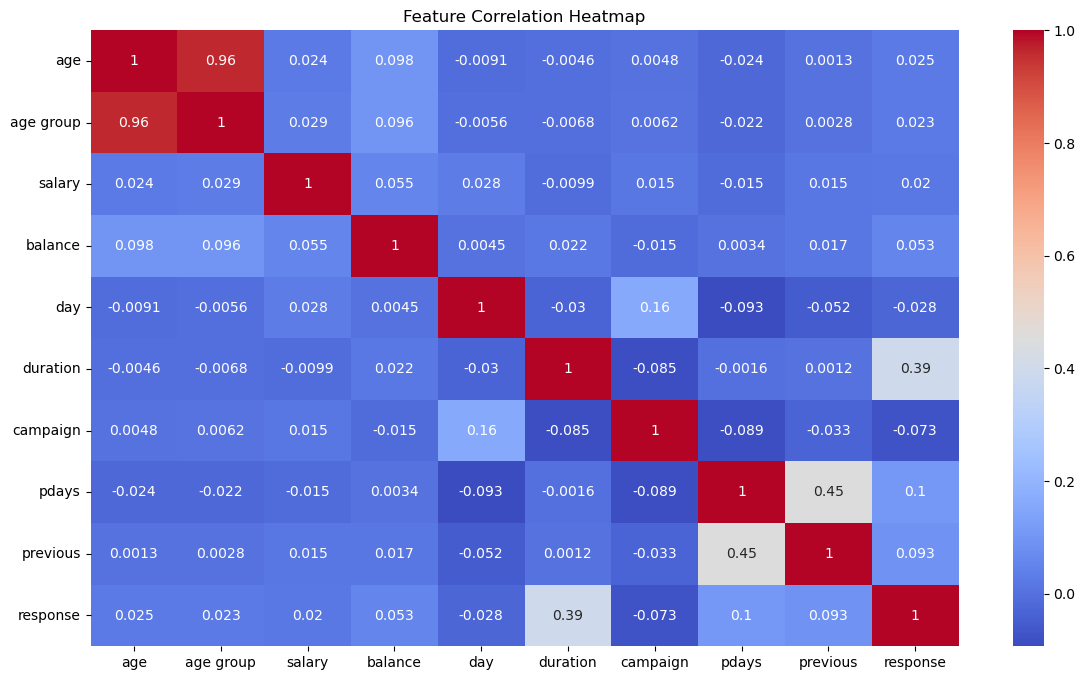

In [11]:
# Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

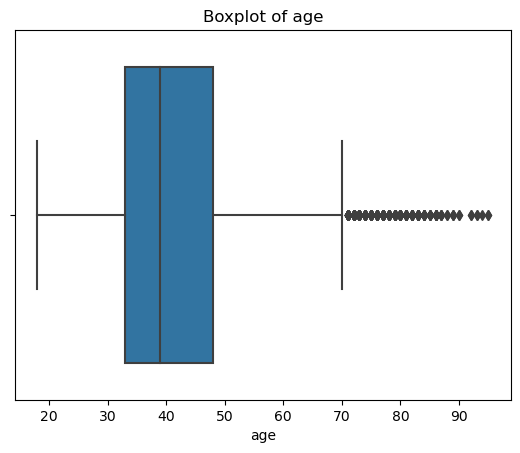

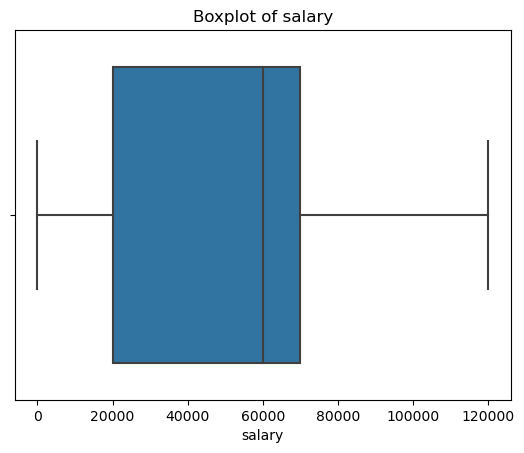

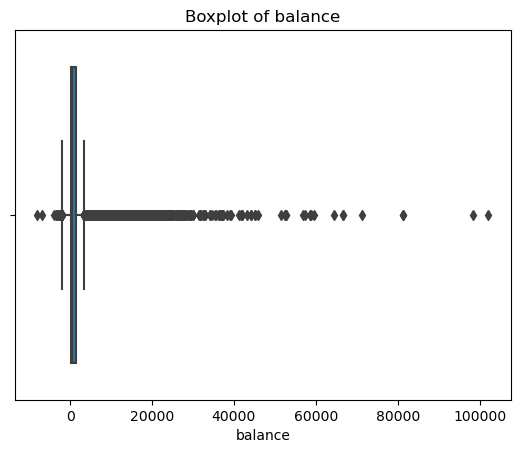

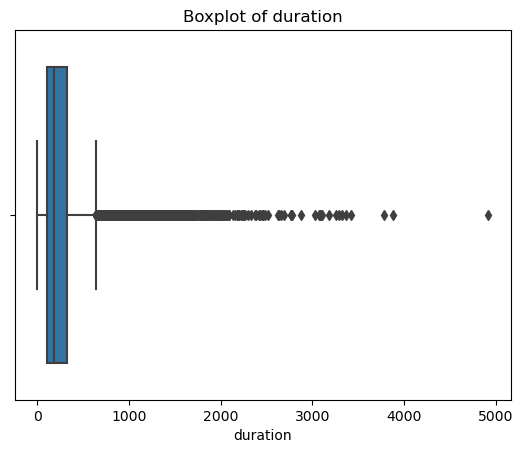

In [12]:
# Boxplots for Outliers
for column in ['age', 'salary', 'balance', 'duration']:
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

Probability and Statistical Analysis

In [13]:
# Probability of attrition (y = 'yes') by department or performance (replace accordingly)
prob_attrition = df[df['y'] == 'yes'].shape[0] / df.shape[0]
print("Probability of attrition (y=yes):", round(prob_attrition, 3))

Probability of attrition (y=yes): 0.117


In [14]:
# Bayes' Theorem Example
# P(A|B) = (P(B|A) * P(A)) / P(B)
# Example: Probability of attrition given default='yes'

P_A = df[df['y'] == 'yes'].shape[0] / df.shape[0]
P_B = df[df['default'] == 'yes'].shape[0] / df.shape[0]
P_B_given_A = df[(df['default'] == 'yes') & (df['y'] == 'yes')].shape[0] / df[df['y'] == 'yes'].shape[0]

P_A_given_B = (P_B_given_A * P_A) / P_B if P_B != 0 else 0
print("P(Attrition | Default=yes):", round(P_A_given_B, 3))


P(Attrition | Default=yes): 0.064


In [15]:
# Hypothesis Test: Performance score across marital status
from scipy.stats import f_oneway

married = df[df['marital'] == 'married']['duration']
single = df[df['marital'] == 'single']['duration']
divorced = df[df['marital'] == 'divorced']['duration']

f_stat, p_val = f_oneway(married, single, divorced)
print("F-statistic:", f_stat, "P-value:", p_val)


F-statistic: 12.078630055775223 P-value: 5.697950277614421e-06


Predictive Modeling

In [16]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encode categorical features
label_enc = LabelEncoder()
df['y'] = label_enc.fit_transform(df['y'])  # Target (0 = No, 1 = Yes)

for col in ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'poutcome', 'default']:
    df[col] = label_enc.fit_transform(df[col])

# Feature Scaling
scaler = MinMaxScaler()
df[['salary', 'balance', 'duration', 'campaign']] = scaler.fit_transform(df[['salary', 'balance', 'duration', 'campaign']])


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Features and Target
X = df.drop(['y', 'name', 'employee id'], axis=1, errors='ignore')
y = df['y']

# Encode target if needed
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Encode all categorical features
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[7952    0]
 [   0 1091]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7952
           1       1.00      1.00      1.00      1091

    accuracy                           1.00      9043
   macro avg       1.00      1.00      1.00      9043
weighted avg       1.00      1.00      1.00      9043



R2 Score: 0.16958341148155875
Mean Squared Error: 0.002321380921402737


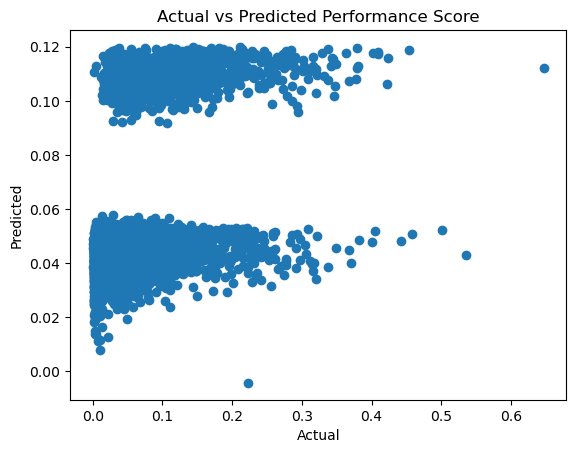

In [20]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Target and Features
y = df['duration']
X = df.drop(['duration', 'name', 'employee id', 'y'], axis=1, errors='ignore')

# Encode all categorical features
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Performance Score")
plt.show()


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Reuse previous scaled X and y = 'duration'
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Regression output

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
905/905 [==============================] - 7s 4ms/step - loss: 0.2783 - val_loss: 0.0251
Epoch 2/50
905/905 [==============================] - 2s 3ms/step - loss: 0.0420 - val_loss: 0.0059
Epoch 3/50
905/905 [==============================] - 2s 2ms/step - loss: 0.1799 - val_loss: 0.0141
Epoch 4/50
905/905 [==============================] - 2s 2ms/step - loss: 0.0217 - val_loss: 0.0108
Epoch 5/50
905/905 [==============================] - 2s 3ms/step - loss: 0.0344 - val_loss: 0.0129
Epoch 6/50
905/905 [==============================] - 2s 3ms/step - loss: 0.0261 - val_loss: 0.0365
Epoch 7/50
905/905 [==============================] - 2s 2ms/step - loss: 0.0452 - val_loss: 0.0592
Epoch 8/50
905/905 [==============================] - 2s 2ms/step - loss: 0.0260 - val_loss: 0.0056
Epoch 9/50
905/905 [==============================] - 3s 3ms/step - loss: 0.0486 - val_loss: 0.0083
Epoch 10/50
905/905 [==============================] - 3s 3ms/step - loss: 0.0144 - val_loss: 0.0030

In [23]:
y = df['y']
X = df.drop(['y', 'duration', 'name', 'employee id'], axis=1, errors='ignore')

# Convert categorical to numeric
X = pd.get_dummies(X, drop_first=True)

# Handle missing values
X = X.fillna(0)
y = y.fillna(0)

# Ensure all data is float
X = X.astype('float32')
y = y.astype('float32')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
905/905 [==============================] - 6s 4ms/step - loss: 0.1828 - accuracy: 0.9417 - val_loss: 0.0327 - val_accuracy: 0.9956
Epoch 2/50
905/905 [==============================] - 2s 3ms/step - loss: 0.0199 - accuracy: 0.9951 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 3/50
905/905 [==============================] - 2s 3ms/step - loss: 0.0088 - accuracy: 0.9982 - val_loss: 5.4267e-04 - val_accuracy: 1.0000
Epoch 4/50
905/905 [==============================] - 2s 3ms/step - loss: 4.1659e-04 - accuracy: 1.0000 - val_loss: 3.1153e-04 - val_accuracy: 1.0000
Epoch 5/50
905/905 [==============================] - 3s 3ms/step - loss: 0.0312 - accuracy: 0.9962 - val_loss: 2.0460e-04 - val_accuracy: 1.0000
Epoch 6/50
905/905 [==============================] - 2s 3ms/step - loss: 1.2807e-04 - accuracy: 1.0000 - val_loss: 8.1073e-05 - val_accuracy: 1.0000
Epoch 7/50
905/905 [==============================] - 3s 3ms/step - loss: 6.1212e-05 - accuracy: 1.0000 - val_loss: 5.5961e-

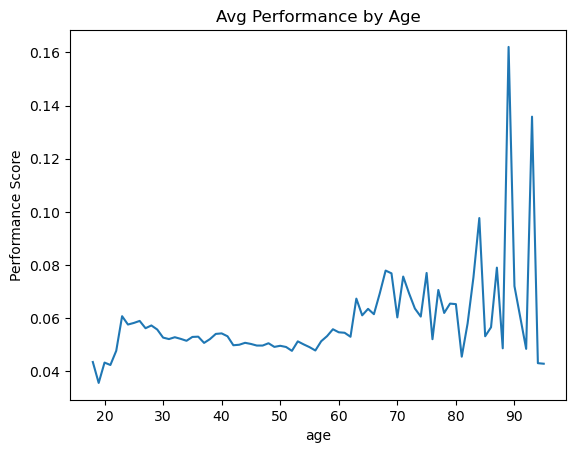

In [24]:
# Line Plot – Performance Trend (fake grouped)
df.groupby('age')['duration'].mean().plot(kind='line', title='Avg Performance by Age')
plt.ylabel("Performance Score")
plt.show()

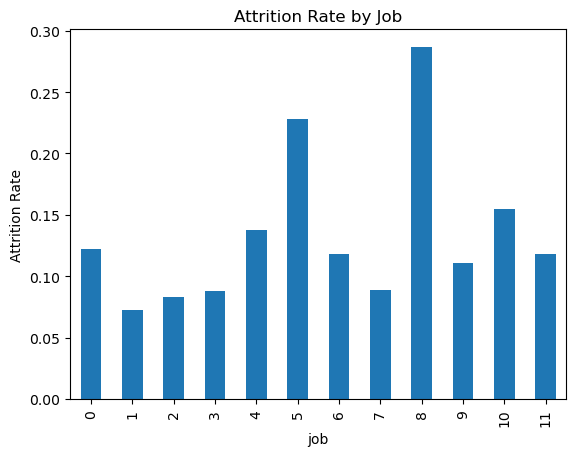

In [25]:
# Bar Chart – Department-wise Attrition
df.groupby('job')['y'].mean().plot(kind='bar', title='Attrition Rate by Job')
plt.ylabel("Attrition Rate")
plt.show()

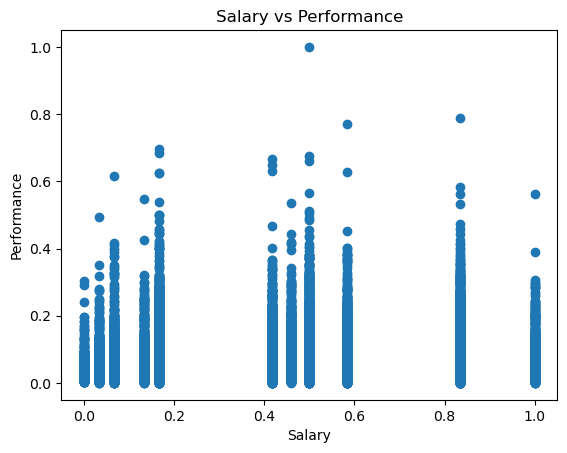

In [26]:
# Scatter Plot – Salary vs Performance
plt.scatter(df['salary'], df['duration'])
plt.title("Salary vs Performance")
plt.xlabel("Salary")
plt.ylabel("Performance")
plt.show()